In [1]:
import matplotlib.pyplot as plt
import geopandas
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#epsg = 'EPSG:3857'
epsg = "EPSG:4674" #sirgas 2000
#epsg = 'EPSG:3395' #world mercator

In [4]:
import cartopy.crs as ccrs
import numpy as np

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

In [5]:
municipios = geopandas.read_file('municipios/Municipios_IBGE.shp')

In [6]:
#municipios.head()

In [7]:
brasil = geopandas.read_file('Brasil/UFEBRASIL.shp')
brasil = brasil.to_crs({'init': epsg})

In [8]:
rs = brasil[brasil['NM_ESTADO'] == 'RIO GRANDE DO SUL']

In [9]:
municipios = municipios.to_crs({'init': epsg})

In [10]:
lista_municipio = ['Caxias do Sul', 'Santa Maria', 'Porto Alegre', 'Pelotas']
def plot_municipios(municipios, lista_municipio, ax, c='black', delta=0.05):
    x = []
    y = []
    for index, row in municipios.iterrows():
        for m in lista_municipio:
            if row['NOME'] == m.upper():
                y.append(row['LATITUDESE'])
                x.append(row['LONGITUDES'])
    ax.scatter(x=x, y=y, marker='x', c=c)
    for i, txt in enumerate(lista_municipio[::-1]):
        ax.annotate(txt, (x[i]+delta, y[i]+delta), c=c)

In [11]:
muni_sup_veget = ['Rosario do Sul', 'Alegrete', 'Dom Pedrito', 'Encruzilhada do Sul', 'Santana do Livramento', 'Uruguaiana', 'Sao Gabriel', 'Bage', 'Piratini', 'Sao Borja', 'Itaqui', 'Jaguarao', 'Sao Francisco de Assis', 'Cachoeira do Sul', 'Santiago', 'Cacequi', 'Santa Maria', 'Macambara', 'Tupancireta']
muni_sup_veget_df = geopandas.GeoDataFrame()
muni_sup_veget_df.crs = epsg

for index, row in municipios.iterrows():
    for m in muni_sup_veget:
        if row['NOME'] == m.upper():
            #print(row['NOME'])
            muni_sup_veget_df = muni_sup_veget_df.append(row)
            
#muni_sup_veget_df = muni_sup_veget_df.to_crs({'init': epsg})

In [12]:
ucs = geopandas.read_file("ucs/ucstodas.shp")
ucs.crs = epsg
ucs = ucs.to_crs({'init': epsg})

In [13]:
uc_mun = geopandas.read_file("uc_munip/Limites_UCs_Municipais_RS-polygon.shp")
uc_mun.crs = epsg
uc_mun = uc_mun.to_crs({'init': epsg})

In [14]:
uc_mun_dic = {
    'APA':'Área de Proteção Ambiental',
    'ARIE':'Área de Relevante Interesse Ecológico',
    'MoNa':'Monumento Natural',
    'PNM':'Parque',
    'REBIO':'Reserva Biológica',
    'Rebio':'Reserva Biológica',
    'RVS':'Refúgio de Vida Silvestre',
}

In [15]:
uc_mun['tipo'] = 'N/D'
for idx, row in uc_mun.iterrows():
    cod = row['Name'].split()[0]
    for i in uc_mun_dic:
        if cod == i:
            uc_mun.loc[idx, 'tipo'] = uc_mun_dic[i]

In [16]:
uc_mun.head()

,Name,descriptio,altitudeMo,Field_1,FID,Nome,geometry,tipo
0,APA CARAA,None,clampToGround,APA CARAA,1,APA CARAA,"POLYGON ((-50.22714 -29.70899, -50.22722 -29.7...",Área de Proteção Ambiental
1,APA Lagoa de Itapeva,None,clampToGround,APA Lagoa de Itapeva,2,APA Lagoa de Itapeva,"POLYGON ((-49.83519 -29.42322, -49.83230 -29.4...",Área de Proteção Ambiental
2,ARIE Henrique Luiz Roessler,None,clampToGround,ARIE Henrique Luiz Roessler,5,ARIE Henrique Luiz Roessler,"POLYGON ((-51.11193 -29.68986, -51.11185 -29.6...",Área de Relevante Interesse Ecológico
3,ARIE SÃ£o Bernardo,None,clampToGround,ARIE SÃ£o Bernardo,6,ARIE SÃ£o Bernardo,"POLYGON ((-50.58332 -29.45431, -50.57990 -29.4...",Área de Relevante Interesse Ecológico
4,MoNa Palanquinho,None,clampToGround,MoNa Palanquinho,7,MoNa Palanquinho,"POLYGON ((-50.79837 -28.88322, -50.79823 -28.8...",Monumento Natural


In [17]:
#ucs.head()

In [18]:
ucs_cat = np.unique(ucs['CATEGORI3'])

In [19]:
ti = geopandas.read_file("ti_sirgas/ti_sirgasPolygon.shp")
ti = ti.to_crs({'init': epsg})
ti = ti[ti['uf_sigla'] == 'RS']

In [20]:
#ti.head()

In [21]:
qui = geopandas.read_file("Áreas de Quilombolas_RS/Áreas de Quilombolas_RS.shp")
qui = qui.to_crs({'init': epsg})

In [22]:
ass = geopandas.read_file("Assentamento Brasil_RS/Assentamento Brasil_RS.shp")
ass = ass.to_crs({'init': epsg})

In [23]:
#qui.head()

In [24]:
fl = geopandas.read_file("florestas/florestaspublicas.shp")
fl.crs=epsg
fl = fl.to_crs({'init': epsg})

In [25]:
#fl.head()

In [26]:
#removendo nao RS
areas_amb = [ucs]

for a in areas_amb:
    for idx, row in a.iterrows():
        p = row['geometry'].centroid
        if rs.iloc[0]['geometry'].contains(p):
            pass
        else:
            a.drop(idx, inplace=True)

In [34]:
areas_amb_concat = geopandas.pd.concat([ucs, uc_mun, ti, qui])

In [28]:
#1° = 111 km
buffer = 3/111
buffer10 = 10/111

b10 = areas_amb_concat.buffer(buffer10, resolution=16)
b10 = geopandas.GeoDataFrame(geometry=b10)

overlay2 = geopandas.overlay(rs, b10, how='intersection')

In [29]:
sigmine = geopandas.read_file("RS/RS.shp")
sigmine = sigmine.to_crs({'init': epsg})
sigmine['ANM'] = 'ANM'

In [30]:
#sigmine.head()

In [31]:
filtro_req1 = sigmine['FASE'] != 'REQUERIMENTO DE PESQUISA'
filtro_req2 = sigmine['FASE'] != 'REQUERIMENTO DE LICENCIAMENTO'
filtro_req3 = sigmine['FASE'] != 'REQUERIMENTO DE LAVRA GARIMPEIRA'
filtro_req4 = sigmine['FASE'] != 'REQUERIMENTO DE REGISTRO DE EXTRAÇÃO'

sigmine = sigmine[filtro_req1 & filtro_req2 & filtro_req3 & filtro_req4]

In [32]:
#contagem geral de processos
municipios['contagem'] = 0
for idx, row in municipios.iterrows():
    nome = row['NOME']
    count = 0
    for idx1, row1 in sigmine.iterrows():
        if row['geometry'].contains(row1['geometry'].centroid):
            count = count + 1
            sigmine.drop(idx1, inplace=True)
    municipios.loc[idx, 'contagem'] = count

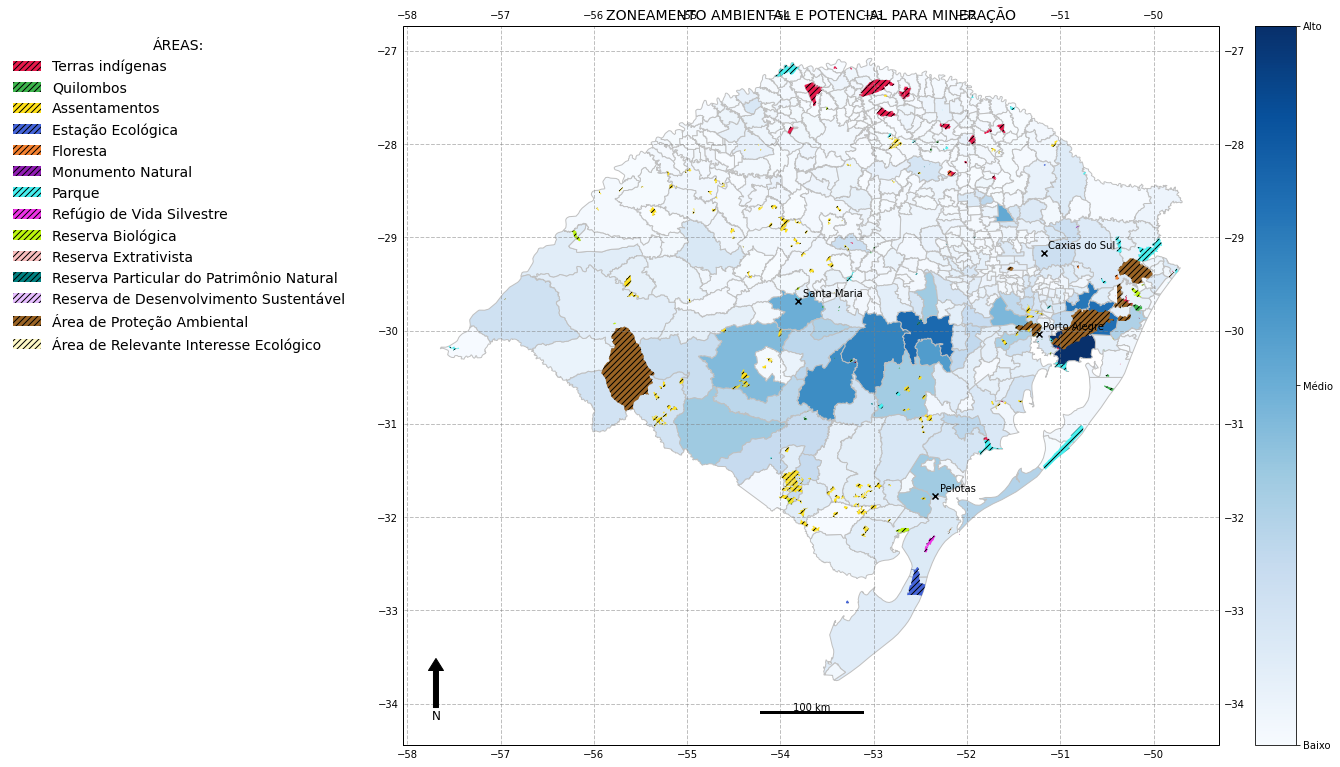

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(16,16), subplot_kw={'projection': ccrs.PlateCarree()})

municipios.plot(ax=ax, column='contagem', legend=False, cmap='Blues', edgecolor='silver')

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.5, axes_class=plt.Axes)
vmax = municipios['contagem'].values.max()
mappable = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
fig.add_axes(ax_cb)
cbar = fig.colorbar(mappable, cax=ax_cb, ticks=[0, 50, 100])
cbar.ax.set_yticklabels(['Baixo', 'Médio', 'Alto'])

areas_ind = [ti, qui, ass]
label = ['Terras indígenas', 'Quilombos', 'Assentamentos',]
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
alpha=[1,1,1,]

hand = []
cc = 0
for i, a in enumerate(areas_ind):
    a.plot(ax=ax, color = colors[cc], hatch='////', alpha=alpha[i])

    h = mpatches.Patch(facecolor=colors[cc], alpha=alpha[i], hatch='////',label=label[i])
    hand.append(h)
    cc = cc+1
        
for idx, c in enumerate(ucs_cat):
    f = ucs['CATEGORI3'] == c
    f1 = uc_mun['tipo'] == c
    uc_mun_plot = uc_mun[f1]
    ucs_plot = ucs[f]
    ucs_plot.plot(ax=ax, color = colors[cc], hatch='////')
    uc_mun_plot.plot(ax=ax, color = colors[cc], hatch='////')
    h = mpatches.Patch(facecolor=colors[cc],alpha=alpha[i],hatch='////',label=c)
    hand.append(h)
    cc = cc+1

#h = mpatches.Patch(facecolor='white',alpha=1, edgecolor='blue', label='Buffer 10 km')
#hand.append(h)
#overlay2.plot(ax=ax, facecolor=(0,0,0,0), edgecolor=(0,0,1,0.5))

lgd1 = plt.legend(handles = hand, bbox_to_anchor=(-22, 1), edgecolor = 'white', fontsize='14', title='ÁREAS:', title_fontsize='14', loc='upper right')
               
scale_bar(ax, 100, location=(0.5,0.01))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

x, y, arrow_length = 0.04, 0.12, 0.08
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
arrowprops=dict(facecolor='black', width=5, headwidth=15),
ha='center', va='center', fontsize=12,
xycoords=ax.transAxes)

plot_municipios(municipios, lista_municipio, ax, c='black', delta=0.05)

ax.set_title('ZONEAMENTO AMBIENTAL E POTENCIAL PARA MINERAÇÃO', loc='center', fontsize='14')

plt.savefig("imagens/ambiental.png", bbox_inches='tight', facecolor='white', dpi = 300, bbox_extra_artists=([ax, lgd1]))